In this lab, we will use 'twarc' Python package to interact with Twitter API v2.

We will use Search Tweets --> Recent search (endpoint)

This API endpoint:
- (By default) Retrieves 10 tweets in the recent 7 days
- (By setting max_results to 100) Can retrieve up to 100 tweets per API request

Ref: https://twarc-project.readthedocs.io/en/latest/api/client2/#twarc.client2.Twarc2.search_recent

Ref: https://www.youtube.com/watch?v=guHH51GDDI0

Ref: https://catriscode.com/2021/05/01/tweets-cleaning-with-python/

In [24]:
import plotly.graph_objects as go
from twarc import Twarc2

In [25]:
# Paste in your own bearer token below
client = Twarc2(
    bearer_token = ''
)

In [26]:
query = 'covid lang=en'

In [27]:
results = client.search_recent(
    query=query,
    max_results=100,
    tweet_fields="author_id,context_annotations"
)

In [28]:
for page in results:
    print("======================")
    print(page)
    data = page['data']

{'data': [{'context_annotations': [{'domain': {'id': '123', 'name': 'Ongoing News Story', 'description': "Ongoing News Stories like 'Brexit'"}, 'entity': {'id': '1220701888179359745', 'name': 'COVID-19'}}], 'text': '@aboutanurse Maar ja, zoals je zegt, jij ziet het niet.\n\nIk wel, zeker als ik probeer vanuit ogen van een Covid patient zijn woorden te lezen.\nOok zonder IC is herstel van Covid patienten te lang. en dan worden je klachten zo belachalijk gemaakt. Het is maar niks, doe niet overdreven etz.', 'id': '1485959854002999305', 'in_reply_to_user_id': '2354429784', 'entities': {'mentions': [{'start': 0, 'end': 12, 'username': 'aboutanurse', 'id': '248155425'}]}, 'referenced_tweets': [{'type': 'replied_to', 'id': '1485959248790102017'}], 'author_id': '2354429784'}, {'context_annotations': [{'domain': {'id': '123', 'name': 'Ongoing News Story', 'description': "Ongoing News Stories like 'Brexit'"}, 'entity': {'id': '1220701888179359745', 'name': 'COVID-19'}}], 'text': 'i-manager’s Ar

{'data': [{'referenced_tweets': [{'type': 'replied_to', 'id': '1484897062315601921'}], 'in_reply_to_user_id': '1475886230957133825', 'text': '@Pitu_Pitu75 @Theodore_John_K @poprawnym2 Konto, na którym to było, jest zawieszone. Był podobny wątek w austriackim parlamencie, ale z cola.\n\nOficjalna narracja i fact checking mowią, że testy działają dobrze tylko z materiałem ludzkim 🤷\n\nhttps://t.co/boDV7wQG6a\n\nhttps://t.co/bJhFtWE72V\n\nhttps://t.co/yJa2SH9pQU', 'entities': {'mentions': [{'start': 0, 'end': 12, 'username': 'Pitu_Pitu75', 'id': '1475886230957133825'}, {'start': 13, 'end': 29, 'username': 'Theodore_John_K', 'id': '1252517806773620738'}, {'start': 30, 'end': 41, 'username': 'poprawnym2', 'id': '1374408761121501189'}]}, 'author_id': '1439880244069011459', 'id': '1485027983140265990'}, {'text': '#sweepstakes #giveaway #Covid_19  Who’s ready for $50K every score change AND two $500K grand prizes? It’s free to enter and easy to play - use my link 👇 #RocketMortgageSquares https

{'data': [{'entities': {'mentions': [{'start': 3, 'end': 12, 'username': 'NewszNow', 'id': '1273846145614143488'}]}, 'author_id': '1027247838403543041', 'referenced_tweets': [{'type': 'retweeted', 'id': '1484044267894886402'}], 'text': 'RT @NewszNow: No funds came from #PMCaresFund for #COVID19 #vaccine development, says #Union govt in reply to #RTI query\n\nhttps://t.co/7PZX…', 'context_annotations': [{'domain': {'id': '123', 'name': 'Ongoing News Story', 'description': "Ongoing News Stories like 'Brexit'"}, 'entity': {'id': '1220701888179359745', 'name': 'COVID-19'}}], 'id': '1484100519530434560'}, {'entities': {'mentions': [{'start': 3, 'end': 12, 'username': 'NewszNow', 'id': '1273846145614143488'}]}, 'author_id': '925915540366925824', 'referenced_tweets': [{'type': 'retweeted', 'id': '1484044267894886402'}], 'text': 'RT @NewszNow: No funds came from #PMCaresFund for #COVID19 #vaccine development, says #Union govt in reply to #RTI query\n\nhttps://t.co/7PZX…', 'context_annotations'

In [29]:
len(data)

81

In [30]:
# Convert JSON into Pandas data frame

import pandas as pd

df = pd.json_normalize(data)

df

,author_id,referenced_tweets,text,context_annotations,id,entities.mentions,in_reply_to_user_id,attachments.media_keys
0,1027247838403543041,"[{'type': 'retweeted', 'id': '1484044267894886...",RT @NewszNow: No funds came from #PMCaresFund ...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",1484100519530434560,"[{'start': 3, 'end': 12, 'username': 'NewszNow...",NaN,NaN
1,925915540366925824,"[{'type': 'retweeted', 'id': '1484044267894886...",RT @NewszNow: No funds came from #PMCaresFund ...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",1484098093453025281,"[{'start': 3, 'end': 12, 'username': 'NewszNow...",NaN,NaN
2,1483398419540738048,"[{'type': 'retweeted', 'id': '1484044267894886...",RT @NewszNow: No funds came from #PMCaresFund ...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",1484069582080196608,"[{'start': 3, 'end': 12, 'username': 'NewszNow...",NaN,NaN
3,1431323267034349568,"[{'type': 'retweeted', 'id': '1484044267894886...",RT @NewszNow: No funds came from #PMCaresFund ...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",1484069450299019268,"[{'start': 3, 'end': 12, 'username': 'NewszNow...",NaN,NaN
4,1483396512671756289,"[{'type': 'retweeted', 'id': '1484044267894886...",RT @NewszNow: No funds came from #PMCaresFund ...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",1484069240777089026,"[{'start': 3, 'end': 12, 'username': 'NewszNow...",NaN,NaN
...,...,...,...,...,...,...,...,...
76,462752042,"[{'type': 'retweeted', 'id': '1483441296534552...",RT @EPSUnions: 4⃣The pandemic demonstrates how...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",1483448791189667854,"[{'start': 3, 'end': 13, 'username': 'EPSUnion...",NaN,NaN
77,628312859,"[{'type': 'retweeted', 'id': '1483445329542500...",RT @cint: https://t.co/c1SEviKkAw\n#Dutch #cov...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",1483445402846302214,"[{'start': 3, 'end': 8, 'username': 'cint', 'i...",NaN,NaN
78,17229748,NaN,https://t.co/c1SEviKkAw\n#Dutch #covid19 Janua...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",1483445329542500360,NaN,NaN,[3_1483445052546424835]
79,36326893,"[{'type': 'replied_to', 'id': '148344129394667...",4⃣The pandemic demonstrates how public health ...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",1483441296534552580,"[{'start': 150, 'end': 166, 'username': 'trans...",36326893,NaN


In [34]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item

tweet_text_list = df['text'].tolist()

tweet_text_list

['RT @NewszNow: No funds came from #PMCaresFund for #COVID19 #vaccine development, says #Union govt in reply to #RTI query\n\nhttps://t.co/7PZX…',
 'RT @NewszNow: No funds came from #PMCaresFund for #COVID19 #vaccine development, says #Union govt in reply to #RTI query\n\nhttps://t.co/7PZX…',
 'RT @NewszNow: No funds came from #PMCaresFund for #COVID19 #vaccine development, says #Union govt in reply to #RTI query\n\nhttps://t.co/7PZX…',
 'RT @NewszNow: No funds came from #PMCaresFund for #COVID19 #vaccine development, says #Union govt in reply to #RTI query\n\nhttps://t.co/7PZX…',
 'RT @NewszNow: No funds came from #PMCaresFund for #COVID19 #vaccine development, says #Union govt in reply to #RTI query\n\nhttps://t.co/7PZX…',
 'RT @NewszNow: No funds came from #PMCaresFund for #COVID19 #vaccine development, says #Union govt in reply to #RTI query\n\nhttps://t.co/7PZX…',
 'RT @NewszNow: No funds came from #PMCaresFund for #COVID19 #vaccine development, says #Union govt in reply to #RTI q

In [ ]:
'''
1) Lowercasing all the letters

This step is important to make sure that all your letters are in uniform.

temp = tweet.lower()
temp
'''

In [ ]:
'''
2) Removing hashtags and mentions

Hashtags and mentions are common in tweets.
There are cases where you want to remove them so you only get the 
clean content of a tweet without all these elements.

You can remove these hashtags and mentions using regex.

import re

temp = re.sub("@[A-Za-z0-9_]+","", temp)
temp = re.sub("#[A-Za-z0-9_]+","", temp)
temp
'''

In [ ]:
'''
3) Removing links

Links are usually not necessary for text processing, so it’s
better to remove them from your text.

temp = re.sub(r"http\S+", "", temp)
temp = re.sub(r"www.\S+", "", temp)
temp
'''

In [ ]:
'''
4) Removing punctuations

Depending on your needs, you may not need punctuations such as
period, comma, exclamation mark, question mark, etc.

temp = re.sub('[()!?]', ' ', temp)
temp = re.sub('\[.*?\]',' ', temp)
temp
'''

In [ ]:
'''
5) Filtering non-alphanumeric characters

The previous step may have removed the punctuations, including all the
non-alphanumeric characters, but just to be sure, we can remove all letters
except the alphabets (a-z) and numbers (0-9). The sign ^ below means except.

temp = re.sub("[^a-z0-9]"," ", temp)
temp
'''

In [ ]:
'''
6) Tokenization

In tokenization, you basically tokenize your text into tokens.

And what is a token? In this case, you split your text into smaller components,
for example a paragraph into a list of sentences, or a sentence into a list of words.

Library such as nltk provides functions such as word_tokenize() or sent_tokenize()
to help you with this.

However, if you just want a simple tokenizing step where you split your text 
into words into a list, then you can do it as simple as the following code.

The result will give you a list of words from your text.

temp = temp.split()
temp
'''

In [ ]:
'''
7) Stop words removal

Stop words are words that are considered unimportant to the meaning of a text.
These words may seem important to us, humans, but to machine these words may be
considered nuisance to the processing steps.

It’s also important to keep in mind that stop words are largely language-dependent.
In English, you have stop words such as for, to, and, or, in, out, etc.

Here I first defined a list of stop words in English.
Then, I match each token with each stop word.

If a token isn’t found in the list of stop words, the token gets saved,
otherwise it’s not saved. In the end, you join all the words into one text again.


stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
 
temp = [w for w in temp if not w in stopwords]
temp = " ".join(word for word in temp)
'''

In [37]:
'''
Text Preprocessing: From Start to Finish

I hope you understand the steps I have explained above.
Now we can combine all those lines of code into one function that we can
call and pass an argument to.

The function then returns a clean text that is ready for you to work with.

Keep in mind that the order of steps here are not absolute.
You can arrange them around depending on your text and your needs.
The code below is what I found to be the most effective on the data I
usually work with, but in case you find another pattern of data,
you can always work them out differently.
'''
import numpy as np
import re

stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [38]:
tweets = ["Get ready for #NatGeoEarthDay! Join us on 4/21 for an evening of music and celebration, exploration and inspiration https://on.natgeo.com/3t0wzQy.",
"Coral in the shallows of Aitutaki Lagoon, Cook Islands, Polynesia https://on.natgeo.com/3gkgq4Z",
"Don't miss our @reddit AMA with author and climber Mark Synnott who will be answering your questions about his historic journey to the North Face of Everest TODAY at 12:00pm ET! Start submitting your questions here: https://on.natgeo.com/3ddSkHk @DuttonBooks"]
 
results = [clean_tweet(tw) for tw in tweets]
results

C:\Users\kjshi\AppData\Local\Temp/ipykernel_15920/1029021058.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['get ready join us 4 21 evening music celebration exploration inspiration',
 'coral shallows aitutaki lagoon cook islands polynesia',
 'dont miss our ama with author climber mark synnott who will be answering your questions about his historic journey north face everest today at 12 00pm et start submitting your questions here']

In [39]:
# Let's go and apply this to our own tweets
my_results = [clean_tweet(tw) for tw in tweet_text_list]
my_results

C:\Users\kjshi\AppData\Local\Temp/ipykernel_15920/1029021058.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['rt no funds came development says govt reply query',
 'rt no funds came development says govt reply query',
 'rt no funds came development says govt reply query',
 'rt no funds came development says govt reply query',
 'rt no funds came development says govt reply query',
 'rt no funds came development says govt reply query',
 'rt no funds came development says govt reply query',
 'rt no funds came development says govt reply query',
 'rt no funds came development says govt reply query',
 'de sterfte door covid 19 is alleen slechts een veelvoud van de sterfte na dus niet door een coronavaccin je weet inmiddels wel dat de hoax van experimentele gentherapie al lang en breed is gedebunked toch',
 'rt sailing biking or hiking however you enjoy greece enjoy it carefree with our free middle seat option flight changes fre',
 'no funds came development says govt reply query',
 'rt vaccines are safe effective this is cherry picking',
 'yesterday eurostat updated total mortality files poland l

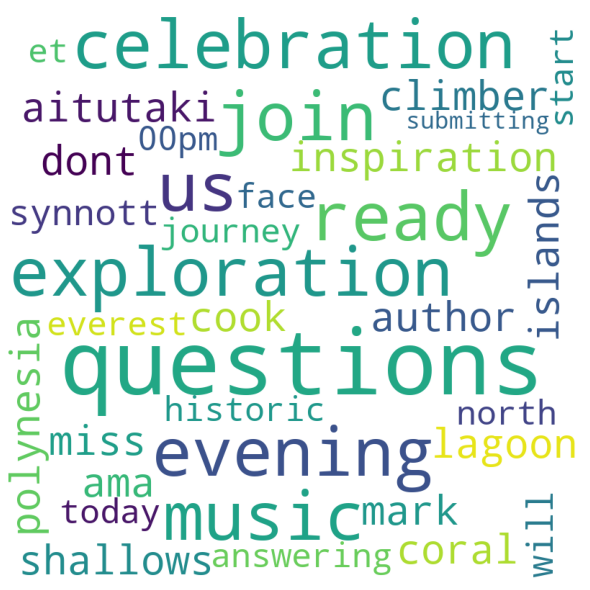

In [46]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()